In [2]:
import numpy as np
from paramsEllipses import ParamsEllipses
from datasetImages import DatasetImages
from datasetDirty import DatasetDirty
from matplotlib import pyplot as plt
import cupy as cp
PATH_GRAPH = '../analysisVariables'



def graph(x,y,labelx,labely,sample,dataset_size,n):
    plt.plot(x,y)
    plt.axis([min(x), max(x), min(y), max(y)])
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()
    plt.savefig(PATH_GRAPH+'/'+labelx+'_vs_'+labely+'_'+str(n)+'x'+str(n)+'_sample_'+str(sample)+'_dataset_size_'+str(dataset_size)+'.png')

def graph_intensity(size_image,dataset_size,sample,list_intensity):
    recursion_average = []
    time_averange = []
    for intensity in list_intensity:
        params= ParamsEllipses(size_image,min_value_intensity = intensity)
        recursion = 0
        time = 0
        for i in range (0,sample):
            dataset = DatasetImages(dataset_size)
            dataset.save(size_image =params.size_figure, params = params, start = 0,finish = dataset_size)
            recursion = recursion + dataset.recursion_average()
            time = time +dataset.time_averange()
        recursion = recursion/sample
        time = time/ sample
        recursion_average.append(recursion)
        time_averange.append(time)
    graph(list_intensity,recursion_average,'minimum_intensity','average_recursion_per_image',sample,dataset_size,params.size_figure)
    graph(list_intensity,time_averange,'minimum_intensity','average_time_per_image',sample,dataset_size,params.size_figure)

    
def graph_percentage_info(size_image,dataset_size,sample,list_percentage_info):
    recursion_average = []
    time_averange = []
    for percentage_info in list_percentage_info:
        params= ParamsEllipses(size_image,percentage_info = percentage_info)
        recursion = 0
        time = 0
        for i in range (0,sample):
            dataset = DatasetImages(dataset_size)
            dataset.save(size_image =params.size_figure, params = params, start = 0,finish = dataset_size)
            recursion = recursion + dataset.recursion_average()
            time = time +dataset.time_averange()
        recursion = recursion/sample
        time = time/ sample
        recursion_average.append(recursion)
        time_averange.append(time)
    graph(list_percentage_info,recursion_average,'percentage_info','average_recursion_per_image',sample,dataset_size,params.size_figure)
    graph(list_percentage_info,time_averange,'percentage_info','average_time_per_image',sample,dataset_size,params.size_figure)

    
def graph_n_operation(size_image,dataset_size,sample,list_n_operation):
    recursion_average = []
    time_averange = []
    for n_operation in list_n_operation:
        params= ParamsEllipses(size_image,n_operation = n_operation)
        recursion = 0
        time = 0
        for i in range (0,sample):
            dataset = DatasetImages(dataset_size)
            dataset.save(size_image =params.size_figure, params = params, start = 0,finish = dataset_size)
            recursion = recursion + dataset.recursion_average()
            time = time +dataset.time_averange()
        recursion = recursion/sample
        time = time/ sample
        recursion_average.append(recursion)
        time_averange.append(time)
    graph(list_n_operation,recursion_average,'n_operation','average_recursion_per_image',sample,dataset_size,params.size_figure)
    graph(list_n_operation,time_averange,'n_operation','average_time_per_image',sample,dataset_size,params.size_figure)


def graph_size_sample(size_image,dataset_size,sample,list_size_sample):
    recursion_average = []
    time_averange = []
    for size_sample in list_size_sample:
        params= ParamsEllipses(size_image,size_sample = size_sample)
        recursion = 0
        time = 0
        for i in range (0,sample):
            dataset = DatasetImages(dataset_size)
            dataset.save(size_image =params.size_figure, params = params, start = 0,finish = dataset_size)
            recursion = recursion + dataset.recursion_average()
            time = time +dataset.time_averange()
        recursion = recursion/sample
        time = time/ sample
        recursion_average.append(recursion)
        time_averange.append(time)
    graph(list_size_sample,recursion_average,'size_sample','average_recursion_per_image',sample,dataset_size,params.size_figure)
    graph(list_size_sample,time_averange,'size_sample','average_time_per_image',sample,dataset_size,params.size_figure)

    
def graph_size_figure(dataset_size,sample,list_size_figure):
    recursion_average = []
    time_averange = []
    for size_figure in list_size_figure:
        params= ParamsEllipses(size_figure)
        recursion = 0
        time = 0
        for i in range (0,sample):
            dataset = DatasetImages(dataset_size)
            dataset.save(size_image =params.size_figure, params = params, start = 0,finish = dataset_size)
            recursion = recursion + dataset.recursion_average()
            time = time +dataset.time_averange()
        recursion = recursion/sample
        time = time/ sample
        recursion_average.append(recursion)
        time_averange.append(time)
    graph(list_size_figure,recursion_average,'size_figure','average_recursion_per_image',sample,dataset_size,params.size_figure)
    graph(list_size_figure,time_averange,'size_figure','average_time_per_image',sample,dataset_size,params.size_figure)

def gauss(tamX,tamY,div):
    x, y = cp.meshgrid(cp.linspace(-1,1,tamX), cp.linspace(-1,1,tamY))
    d = cp.sqrt(x*x+y*y)
    sigma, mu = 1/div, 0.0
    gauss = cp.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
    return gauss
    
def graph_size_figure_conv(dataset_size,sample,list_size_figure):
    time_averange = []
    for size_figure in list_size_figure:
        params= ParamsEllipses(size_figure)
        time = 0
        for i in range (0,sample):
            dataset = DatasetImages(dataset_size)
            images = dataset.save(size_image =params.size_figure, params = params, start = 0,finish = dataset_size)
            type_psf = 'psf_gauss_'+str(size_figure)+'x'+str(size_figure)
            psf = gauss(size_figure,size_figure,size_figure/2)
            dirty = DatasetDirty(N,images,type_psf,psf)
            dirty.save(dataset.images,size_figure,type_psf,psf,start = 0 ,finish = 10)
            time = time +dirty.time_averange()
        time = time/sample
        time_averange.append(time)
    graph(list_size_figure,time_averange,'size_figure','average_time_per_image',sample,dataset_size,params.size_figure)


In [3]:
DATA_SET_SIZE = 10
N = 28
SAMPLE = 10

In [ ]:
list_intensity = np.arange(0.01,0.6,0.01)
graph_intensity(N,DATA_SET_SIZE,SAMPLE,list_intensity)

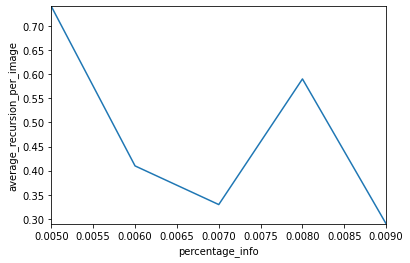

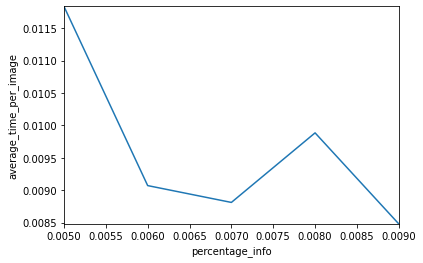

<Figure size 432x288 with 0 Axes>

In [4]:
list_percentage_info = np.arange(0.005,0.01,0.001)
graph_percentage_info(N,DATA_SET_SIZE,SAMPLE,list_percentage_info)

In [ ]:
list_n_operation = np.arange(10,100,10)
graph_n_operation(N,DATA_SET_SIZE,SAMPLE,list_n_operation)


In [ ]:
list_size_sample = np.arange(10,100,10)
graph_size_sample(N,DATA_SET_SIZE,SAMPLE,list_size_sample)


In [ ]:
list_size_figure = np.array([28,64,128,256,512,1024,1920])
graph_size_figure(DATA_SET_SIZE,SAMPLE,list_size_figure)


In [ ]:
list_size_figure = np.array([28,64,128,256,512,1024,1920])
graph_size_figure_conv(DATA_SET_SIZE,SAMPLE,list_size_figure)
